# Setup

Since [Pandas](https://pandas.pydata.org/) is almost a one stop shop for everything data analysis in python anyway, most plotting is done using `df.plot()` syntax, however, you must import [Matplotlib](https://matplotlib.org/index.html) since this is a dependency. I would also recommend installing [Seaborn](https://seaborn.pydata.org/) for more interesting plot types and statistical features. Plus it has a nice native style.

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## Display

Couple options for visualizing in a Jupyter Notebook. Either present static charts `inline`, embed them as interactive elements using `notebook` setting, or open the chart in a new windows using a specified backend (e.g. `GTK3Agg` for raster graphics, `GTK3Cairo` for vector graphics). [ipython source](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) (somewhat out of date), [matplotlib source](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) BTW, [here](https://matplotlib.org/faq/howto_faq.html#howto-webapp) is info on how to run matplotlib in backend of webserver. 

In [3]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib GTK3Cairo

## Style

Call `plt.style.available` to show options, then set the style of choice.

And customize the style sheet manually using `rcParams`

See more on styling here: https://matplotlib.org/users/customizing.html

In [4]:
plt.style.use('seaborn-white')

In [5]:
mpl.rc('figure')
mpl.rc('savefig', transparent=True, dpi=700, bbox='tight', pad_inches=.05, format='png')

For colors, there are endless presets in matplotlib or seaborn. But, you can always construct your own custom length arrays of hues. A good resource, where you will find the acronyms used widely, is [colorbrewer](http://colorbrewer2.org)

# Data

In [7]:
# generate dummy data for 4 categories, and 5 full years, using month start date
df = pd.DataFrame(data=np.random.rand(12*5,4),
                  index=pd.date_range(start=pd.to_datetime(pd.datetime.now().year-5, format='%Y'), periods=12*5, freq='MS'),
                  columns=['A', 'B', 'C', 'D'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2012-01-01 to 2016-12-01
Freq: MS
Data columns (total 4 columns):
A    60 non-null float64
B    60 non-null float64
C    60 non-null float64
D    60 non-null float64
dtypes: float64(4)
memory usage: 2.3 KB


In [9]:
df.describe()

,A,B,C,D
count,60.000000,60.000000,60.000000,60.000000
mean,0.539582,0.467859,0.515946,0.476927
std,0.284895,0.274435,0.307545,0.316712
min,0.010137,0.004119,0.005744,0.001609
25%,0.332853,0.269782,0.268481,0.199802
50%,0.590446,0.431673,0.466712,0.497549
75%,0.783530,0.676171,0.810404,0.748743
max,0.993940,0.998849,0.998368,0.989573


In [10]:
df.head()

,A,B,C,D
2012-01-01,0.941558,0.745601,0.960290,0.343938
2012-02-01,0.028923,0.396211,0.005744,0.853966
2012-03-01,0.446938,0.476391,0.734510,0.260739
2012-04-01,0.601218,0.761639,0.890489,0.028006
2012-05-01,0.202624,0.068185,0.870849,0.036287


In [11]:
df.tail()

,A,B,C,D
2016-08-01,0.277921,0.947152,0.174330,0.011412
2016-09-01,0.815499,0.675900,0.407597,0.552677
2016-10-01,0.631093,0.486282,0.887527,0.960920
2016-11-01,0.676724,0.047986,0.992251,0.778668
2016-12-01,0.773275,0.338131,0.501435,0.723489


## Transform

Group data over time periods. Refer to [Pandas Offset Aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)  

In [12]:
# 1 year periods by year end
df1 = df.groupby(pd.TimeGrouper('1A')).sum()

In [13]:
df1.shape

(5, 4)

In [14]:
# 1 quarter periods by quarter end
df2 = df.groupby(pd.TimeGrouper('1Q')).sum()

In [15]:
df2.shape

(20, 4)

# Visualizations

## Contents

Matplotlib Basics:
- [Multi Line Chart](#Multi-Line-Chart)
- [Stacked Bar Chart](#Stacked-Bar-Chart)

Customizing Matplotlib:
- [Custom Bar Chart](#Custom-Bar-Chart)

Others:
- [Seaborn Scatterplots](#Seaborn-Scatterplots)

## Matplotlib Basics

### Multi Line Chart

c:\miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


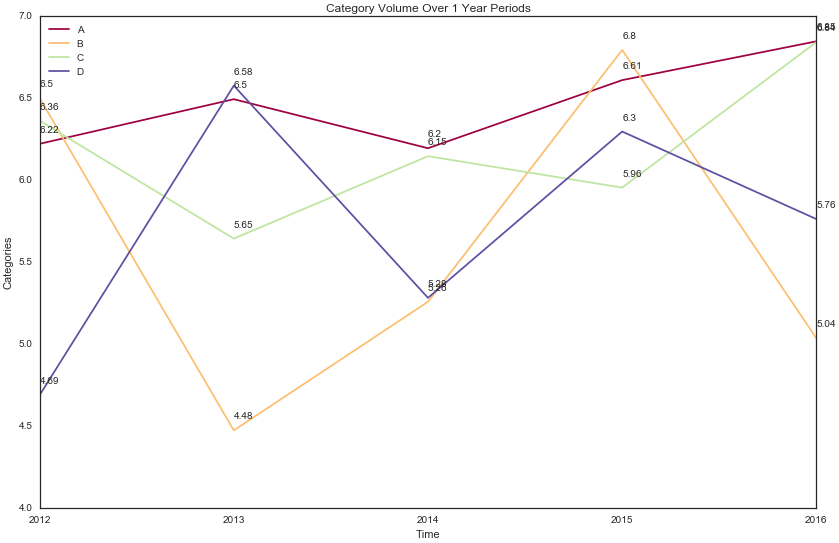

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

df1.plot(ax=ax, colormap='Spectral')

ax.set(ylabel='Categories', xlabel='Time', title='Category Volume Over 1 Year Periods')

# annotate data labels onto series lines
for series in df1.columns:
    for x,y in zip(df1.index, df1[series]):
        ax.annotate(str(round(y,2)), xy=(x,y+(.01*df1.values.max())))

fig.tight_layout(pad=2)
fig.show()

fig.savefig('img/category_volume_over_time_multi_line_chart.png')

### Stacked Bar Chart

c:\miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


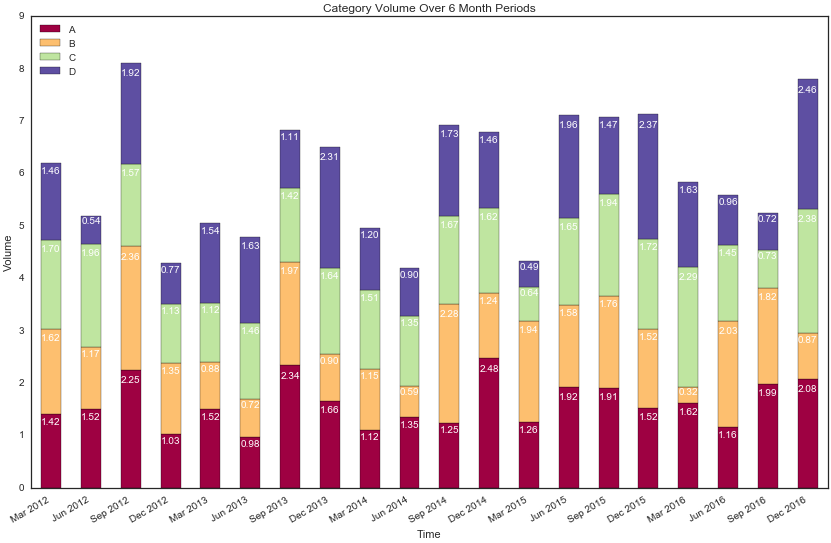

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

df2.plot(kind='bar', stacked=True, ax=ax, colormap='Spectral')

ax.set(ylabel='Volume', xlabel='Time', title='Category Volume Over 6 Month Periods')

# auto format xaxis labels as date
fig.autofmt_xdate()

# custom format xaxis date labels
ax.xaxis.set_major_formatter(plt.FixedFormatter(df2.index.to_series().dt.strftime('%b %Y')))

# annotate data labels onto vertical bars
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([df2.columns,df2.index])):
    label = '{:,.2f}'.format(df2.loc[ix,col])
    stack = df2.iloc[df2.index.get_loc(ix),:df2.columns.get_loc(col)].sum()
    ax.text(s=label, x=bar.get_x()+(bar.get_width()/2), y=stack+bar.get_height()-(.05*bar.get_height()), ha='center', va='top', fontdict={'fontsize':10, 'color':'white'})

fig.tight_layout(pad=2)
fig.show()

fig.savefig('img/category_volume_over_time_stacked_bar_chart.png')

## Advanced Matplotlib

### Custom Bar Chart

c:\miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


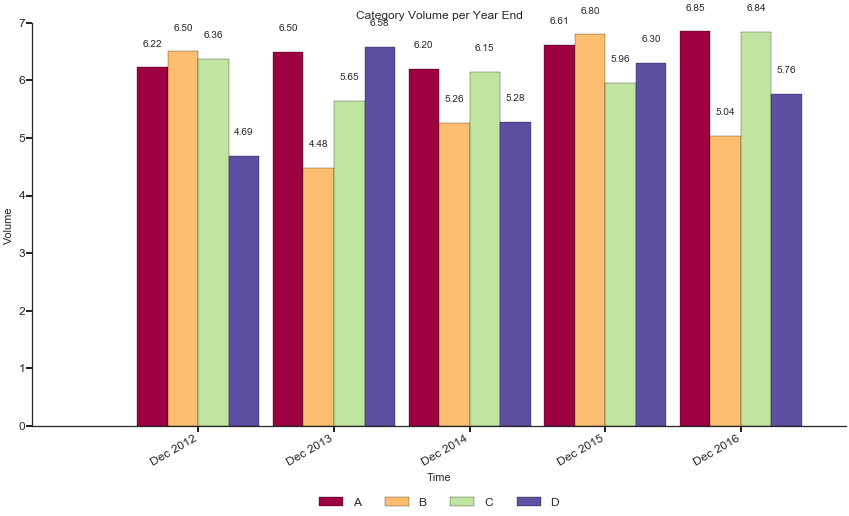

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

series = len(df1.columns)
groups = len(df1.index)
bars = series * groups
width = .90 / series
bar_offset = series * width / 2

# bars
for i,(col,values) in enumerate(df1.iteritems()):
    s = df1.columns.get_loc(col) + 1
    rect = ax.bar(np.arange(groups)+(s*width)-bar_offset, list(values), width=width, 
                  color=mpl.colors.rgb2hex(mpl.cm.get_cmap('Spectral',series)(i)[:3]))

# ticks
ax.set_xticks(np.arange(groups)+width)
ax.set_xticklabels(df1.index.strftime('%b %Y'))
ax.tick_params(axis='both', which='both', direction='out', length=6, width=2,
               left='on', right='off', top='off', bottom='on',
               labelsize=12)

# auto format xaxis labels as date
fig.autofmt_xdate()

ax.set(ylabel='Volume', xlabel='Time', title='Category Volume per Year End')

# labels
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([df1.columns,df1.index])):
    label = '{:,.2f}'.format(df1.loc[ix,col])
    ax.text(s=label, x=bar.get_x()+(bar.get_width()/2), y=bar.get_height()+(.05*df1.values.max()), ha='center', va='bottom', fontdict={'fontsize':10})

# legend
handles, labels = ax.containers, list(df1.columns)
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12, frameon=False)
# centered on top
#lgd = ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0,1.02,1,0.2), ncol=4, fontsize=12, frameon=False)

# remove right and left figure border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = plt.gcf()
fig.tight_layout()
fig.subplots_adjust(top=.9, bottom=.2)
fig.show()

fig.savefig('img/category_volume_per_year_end_custom.png')

## Others

### Seaborn Scatterplots

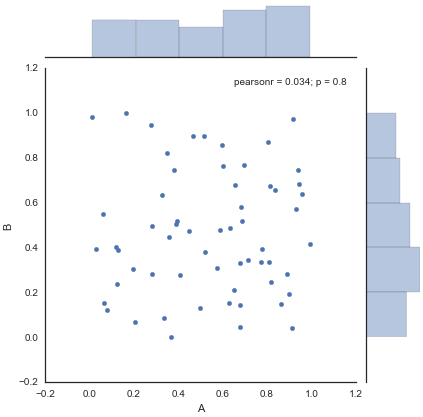

In [19]:
plot = sns.jointplot(df.A, df.B, kind='scatter')
plot.savefig('img/scatterplot.png')

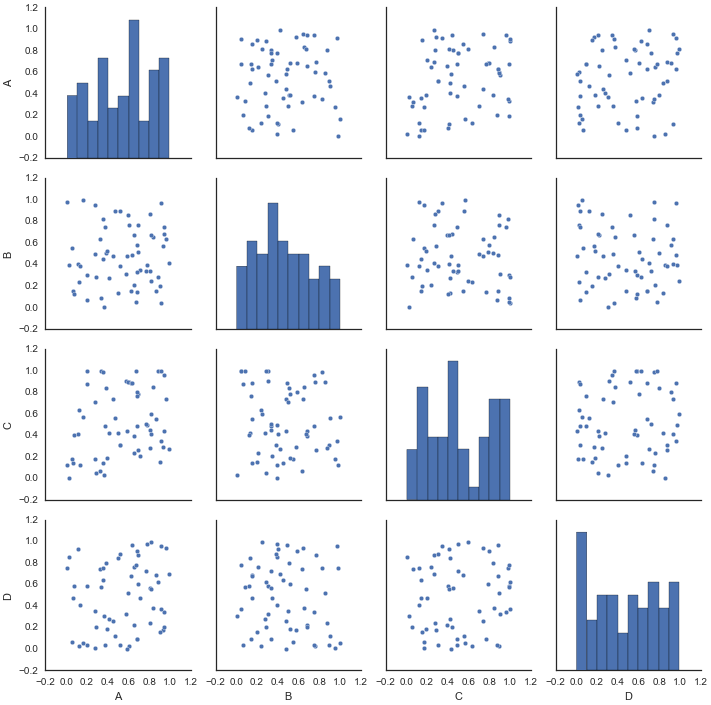

In [20]:
plot = sns.pairplot(df)
plot.savefig('img/scatterplot_matrix.png')

# Resources

- [Matplotlib docs](https://matplotlib.org/contents.html)  
- [Pandas Visualization docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html)  
- [Seaborn docs](https://seaborn.pydata.org/api.html) and [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html#tutorial)  

Chris Moffitt at Practical Business Python has a [great tutorial and helpful infographic](http://pbpython.com/effective-matplotlib.html) on matplotlib  
